In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv('cleaned_data.csv',encoding = 'latin1')

In [3]:
dataset.head()

,Position,Location,Gender,Education,Experience (Years),Salary
0,QNXT Configuration QA/Testing SME,Ghaziabad,Female,B.Tech/B.E.,11,2014.510
1,Provider Data Management,New Delhi,Female,B.Tech/B.E.,24,1624.349
2,Accessibility Engineer QA,Noida,Female,BCA,25,1926.223
3,Java Developer/Spring Boot,Meerut,Male,B.A,11,1128.404
4,iOS Tester,Padampur,Female,B.Com,15,2090.495


In [4]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder_position = LabelEncoder()
encoder_location = LabelEncoder()
encoder_gender = LabelEncoder()
encoder_education = LabelEncoder()

dataset['Position'] = encoder_position.fit_transform(dataset['Position'])
dataset['Location'] = encoder_location.fit_transform(dataset['Location'])
dataset['Gender'] = encoder_gender.fit_transform(dataset['Gender'])
dataset['Education'] = encoder_education.fit_transform(dataset['Education'])

# Display the DataFrame with encoded columns
print(dataset)


      Position  Location  Gender  Education  Experience (Years)    Salary
0          502        24       0          4                  11  2014.510
1          457        58       0          4                  24  1624.349
2           31        60       0          5                  25  1926.223
3          290        48       1          0                  11  1128.404
4          724        64       0          2                  15  2090.495
...        ...       ...     ...        ...                 ...       ...
3262       563         5       1          4                  24   604.653
3263       563        30       1          4                  21   816.277
3264       563         5       1          5                  20  1786.298
3265       563        26       1          0                  25   764.525
3266       563        68       1          2                  24  2252.207

[3267 rows x 6 columns]


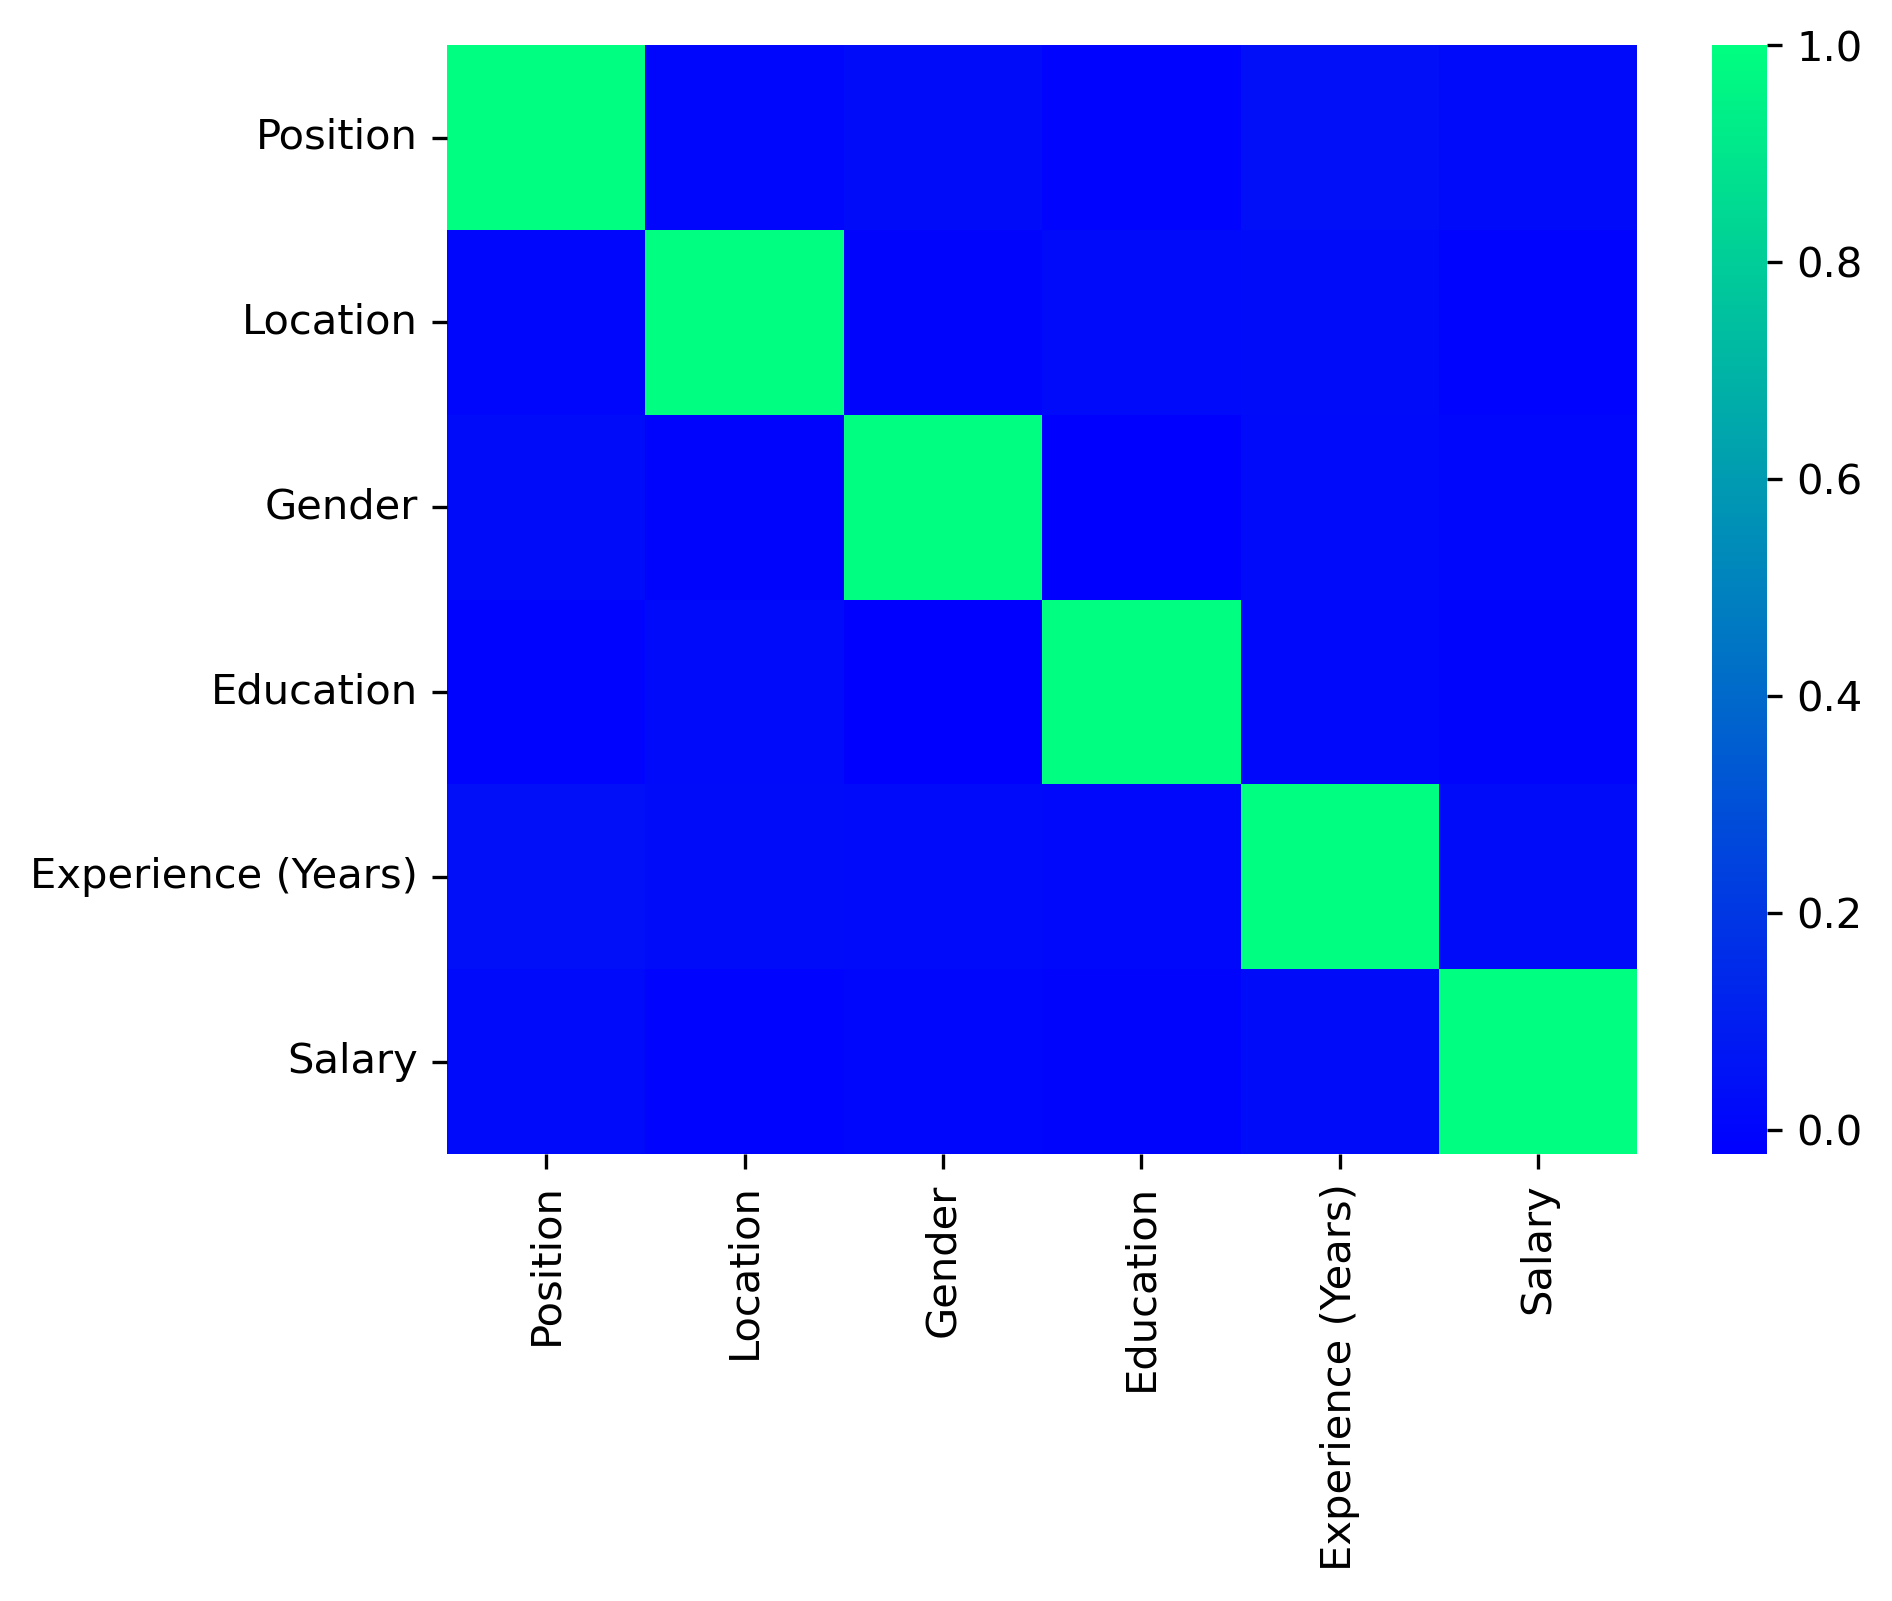

In [5]:
import seaborn as sns
plt.figure(dpi=300)
numeric_dataset = dataset.select_dtypes(include='number')
sns.heatmap(numeric_dataset.corr(), annot=False, cmap='winter')
plt.show()

In [6]:
dataset['Position_Location'] = dataset['Position'] * dataset['Location']

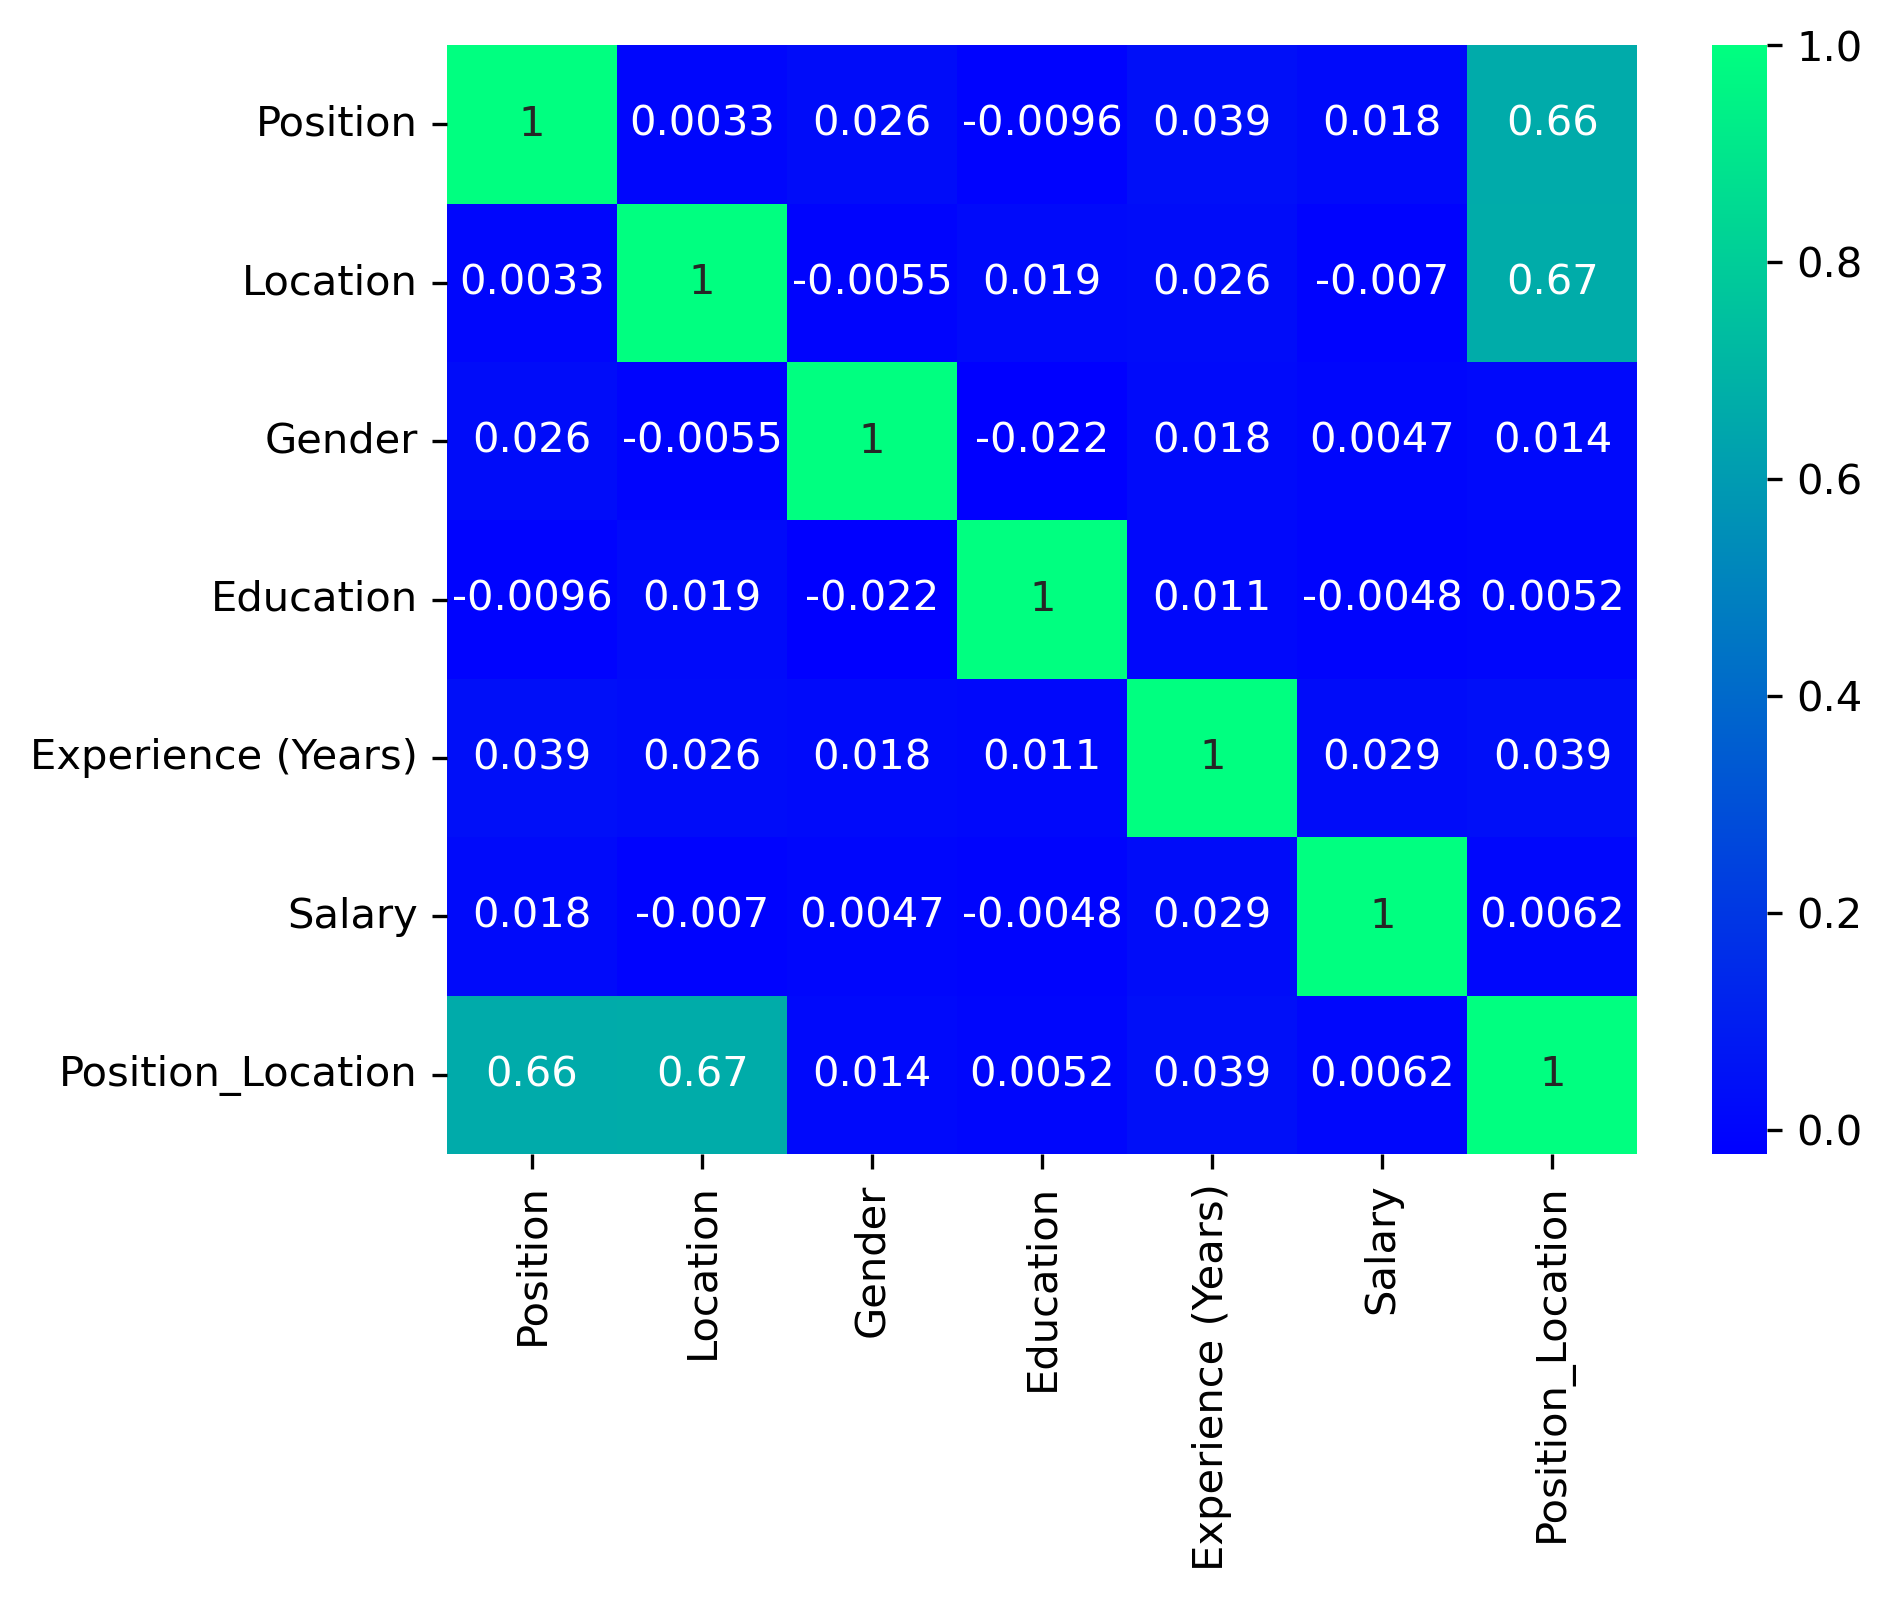

In [7]:
import seaborn as sns
plt.figure(dpi=300)
numeric_dataset = dataset.select_dtypes(include='number')
sns.heatmap(numeric_dataset.corr(), annot=True, cmap='winter')
plt.show()

In [8]:
x = dataset[['Position_Location','Experience (Years)']]

y=dataset.iloc[:,-1].values

In [9]:
x

,Position_Location,Experience (Years)
0,12048,11
1,26506,24
2,1860,25
3,13920,11
4,46336,15
...,...,...
3262,2815,24
3263,16890,21
3264,2815,20
3265,14638,25


In [10]:
y

array([12048, 26506,  1860, ...,  2815, 14638, 38284])

In [11]:
#spletting my data set into traing set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [13]:
x_test_scaled

array([[ 0.2878876 ,  1.22733516],
       [ 1.27874341,  0.0658    ],
       [-0.3799788 , -1.09573516],
       ...,
       [ 0.97616267, -1.53131085],
       [-0.38766902, -0.95054326],
       [ 0.83211885,  1.22733516]])

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [15]:
regressor.score(x_train_scaled,y_train)

1.0

In [16]:
regressor.score(x_test_scaled,y_test)

1.0

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, x_train, y_train, cv=100)
print("Cross-validation scores:", scores)
print("Mean CV score:", scores.mean())

Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]
Mean CV score: 1.0
